In [11]:
from os import path
from tabulate import tabulate
from process import *

In [34]:
# Set up dirs/filenames
results_dir = 'perftest/results'
num_hosts = '20'
num_tests = 6
hosts = [20, 30, 40, 50]
hosts_dirs = [results_dir + '/results_{}hosts_0{}'.format(num_hosts, str(i)) for i in range(1, num_tests+1)]

protocols = ['dsp', 'ecmp', 'ksp']
exps = ['eight', 'single']
filenames = [['{0}_{1}.txt'.format(p, e) for p in protocols] for e in exps]

In [19]:
results = []
ecmp_results = read_file('perftest/results/results_20hosts_01/ecmp_eight.txt')
results.append(ecmp_results)

ksp_results = read_file('perftest/results/results_20hosts_01/ecmp_eight.txt')
results.append(ksp_results)

dsp_results = read_file('perftest/results/results_20hosts_01/ecmp_eight.txt')
results.append(dsp_results)

print("\n10 Client/Server Flows, 8 Parallel Connections:")
results_table(results)


10 Client/Server Flows, 8 Parallel Connections:
                       Average Transfer (Mbytes)    Average Throughput (Mbits/sec)    Average RTT (us)
-------------------  ---------------------------  --------------------------------  ------------------
8-Way ECMP                                 49.56                             39.17              248056
8-Shorest Paths                            49.56                             39.17              248056
Diverse Short Paths                        49.56                             39.17              248056


In [21]:
dsp_results = read_file('perftest/results/results_20hosts_01/ecmp_eight.txt')
dsp_results

[49.56, 39.17, 248056.0375]

In [ ]:
def get_tpt_vs_hosts(protocol, exp):
    pass

In [ ]:
def get_latency_vs_hosts(protocol, exp):
    pass

# Data Visualizations

In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [75]:
def plot_metric_vs_hosts(ecmp_data, ksp_data, dsp_data, metric):
    fig = plt.figure()
    ax = plt.subplot(111)
    ax.plot(hosts, ecmp_data, label='ECMP')
    ax.plot(hosts, ksp_data, label='KSP')
    ax.plot(hosts, dsp_data, label='DSP')
    plt.title('{} vs number of hosts'.format(metric))
    ax.legend()

    t_min, t_max = 0, np.max([ecmp_data, ksp_data, dsp_data])
    # plt.axis((hosts[0], hosts[-1], 0, t_max))
    plt.xticks(hosts)
    # plt.yticks(np.arange(t_min, t_max+1, 1))

    plt.show()

## Throughput

In [78]:
ecmp_data = [i*10 for i in range(len(hosts))]
ksp_data = [i*15 for i in range(len(hosts))]
dsp_data = [i*20 for i in range(len(hosts))]

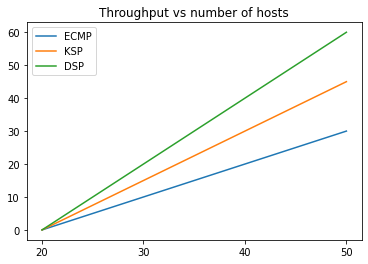

In [79]:
plot_metric_vs_hosts(ecmp_data, ksp_data, dsp_data, 'Throughput')

## Latency